In [2]:
!pip install qutip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 18.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from qutip import *


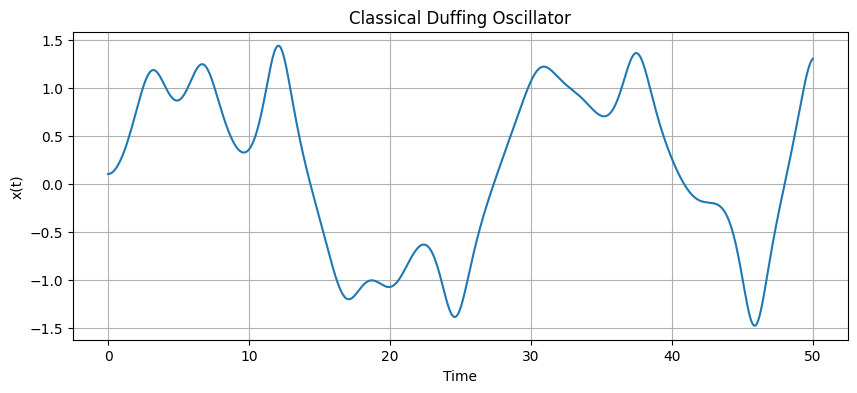

In [5]:
# Duffing oscillator differential equation
def duffing(t, y, delta=0.2, alpha=-1.0, beta=1.0, gamma=0.3, omega=1.2):
    x, v = y
    dxdt = v
    dvdt = -delta * v - alpha * x - beta * x**3 + gamma * np.cos(omega * t)
    return [dxdt, dvdt]

# Initial conditions
y0 = [0.1, 0.0]
t_span = (0, 50)
t_eval = np.linspace(*t_span, 2000)

# Solve
sol = solve_ivp(duffing, t_span, y0, t_eval=t_eval)

# Plot classical position x(t)
plt.figure(figsize=(10, 4))
plt.plot(sol.t, sol.y[0])
plt.title('Classical Duffing Oscillator')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.show()


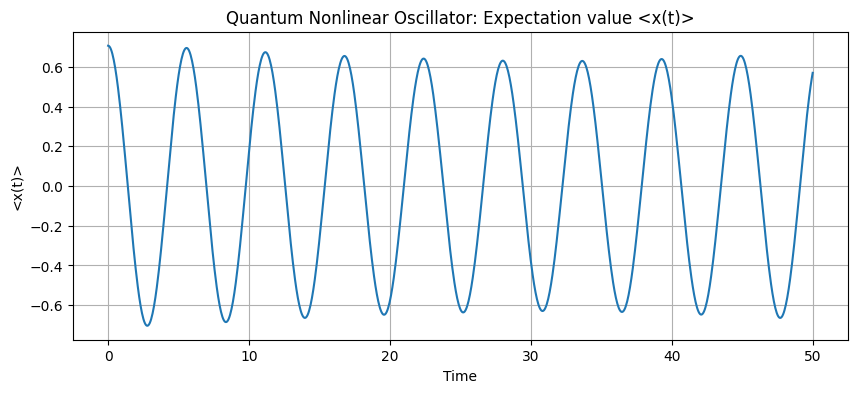

In [ ]:
# Setup
N = 30  # Hilbert space size
a = destroy(N)
x = (a + a.dag()) / np.sqrt(2)
p = -1j * (a - a.dag()) / np.sqrt(2)

# Quantum Hamiltonian with x^4 term
H = p**2 / 2 + 0.5 * x**2 + 0.05 * x**4

# Initial quantum state: superposition of ground and first excited states
psi0 = (basis(N,0) + basis(N,1)).unit()

# Time evolution
times = np.linspace(0, 50, 1000)
result = mesolve(H, psi0, times, [], [x, p])

# Plot <x(t)>
plt.figure(figsize=(10, 4))
plt.plot(times, result.expect[0])
plt.title('Quantum Nonlinear Oscillator: Expectation value <x(t)>')
plt.xlabel('Time')
plt.ylabel('<x(t)>')
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


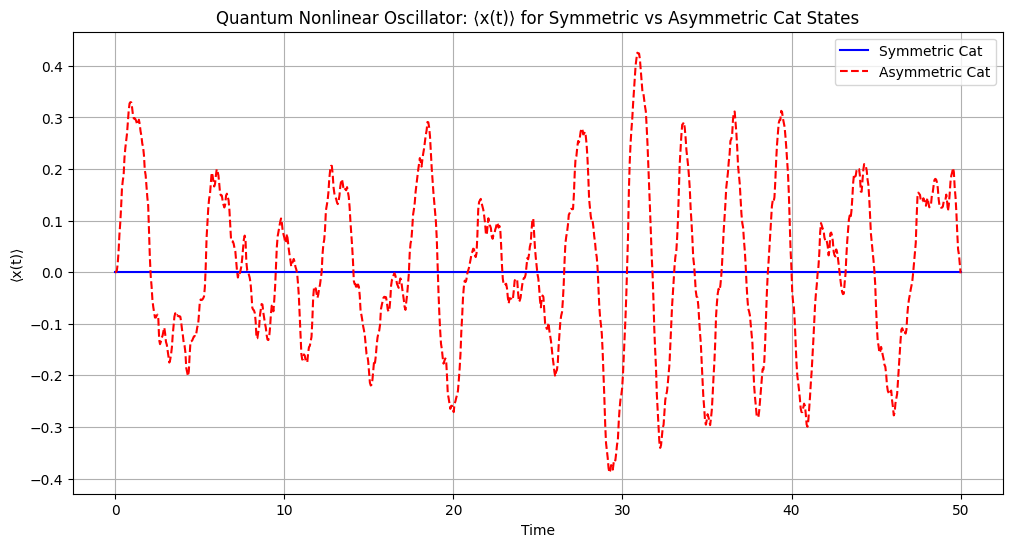

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Setup
N = 30
a = destroy(N)
x = (a + a.dag()) / np.sqrt(2)
p = -1j * (a - a.dag()) / np.sqrt(2)

# Hamiltonian (quantum nonlinear oscillator)
H = p**2 / 2 + 0.5 * x**2 + 0.2 * x**4

# Parameters
alpha = 2.0

# Symmetric cat state: (|alpha⟩ + |-alpha⟩) / normalization
cat_symmetric = (coherent(N, alpha) + coherent(N, -alpha)).unit()

# Asymmetric cat state: (|alpha⟩ + e^{iθ}|-alpha⟩) / normalization
cat_asymmetric = (coherent(N, alpha) + np.exp(1j * 0.3) * coherent(N, -alpha)).unit()

# Time evolution parameters
times = np.linspace(0, 50, 1000)

# Solve for symmetric cat
result_sym = mesolve(H, cat_symmetric, times, [], [x, p])

# Solve for asymmetric cat
result_asym = mesolve(H, cat_asymmetric, times, [], [x, p])

# Plot results
plt.figure(figsize=(12, 6))

# Symmetric cat plot
plt.plot(times, result_sym.expect[0], label="Symmetric Cat", color='blue')

# Asymmetric cat plot
plt.plot(times, result_asym.expect[0], label="Asymmetric Cat", color='red', linestyle='--')

plt.title('Quantum Nonlinear Oscillator: ⟨x(t)⟩ for Symmetric vs Asymmetric Cat States')
plt.xlabel('Time')
plt.ylabel('⟨x(t)⟩')
plt.legend()
plt.grid()
plt.show()


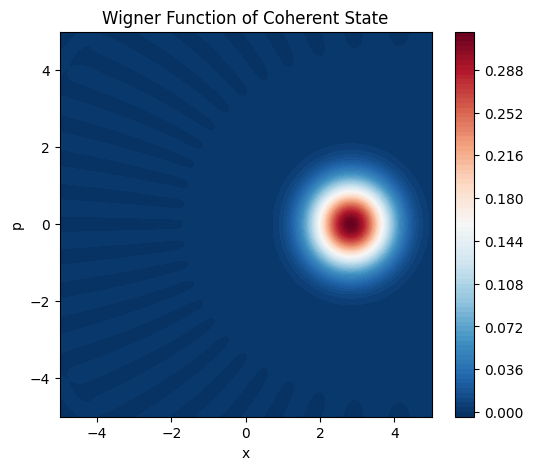

In [7]:
N = 30  # Hilbert space dimension
alpha = 2.0  # amplitude of coherent state
coh = coherent(N, alpha)

xvec = np.linspace(-5, 5, 500)
W = wigner(coh, xvec, xvec)

plt.figure(figsize=(6, 5))
plt.contourf(xvec, xvec, W, 100, cmap='RdBu_r')
plt.title('Wigner Function of Coherent State')
plt.xlabel('x')
plt.ylabel('p')
plt.colorbar()
plt.show()

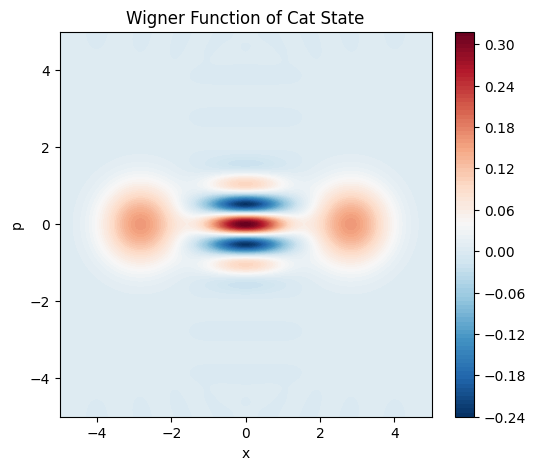

In [ ]:
# Wigner plot of the initial cat state
xvec = np.linspace(-5,5,500)
W = wigner(cat_plus, xvec, xvec)

plt.figure(figsize=(6,5))
plt.contourf(xvec, xvec, W, 100, cmap='RdBu_r')
plt.title('Wigner Function of Cat State')
plt.xlabel('x')
plt.ylabel('p')
plt.colorbar()
plt.show()
